In [3]:
import pandas as pd
import os
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt


from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Data Science Project/data"
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_bids = pd.read_csv("bids.csv")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Data Science Project/data


In [0]:
data_bids = data_bids.replace({' ': ''}, regex = True)

In [0]:
data_bids_sorted = data_bids.sort_values(by=['bidder_id', 'time'], ascending = [True, True]) ##sorting the data by the bidder_id and time 

In [0]:
bids = pd.DataFrame(data = data_bids_sorted["bidder_id"].unique(), columns = ["bidder_id"], index = data_bids_sorted["bidder_id"].unique()) 

In [0]:
counts = data_bids_sorted["bidder_id"].value_counts()
bids["auction_count_num"] = counts

In [0]:
timediff = data_bids_sorted.groupby("bidder_id")["time"].diff()
timediff_str = timediff.astype(str).fillna('')
data_bids_sorted["timediff_num"] = timediff
data_bids_sorted["timediff"] = timediff_str

In [0]:
text_cols = ["auction", "merchandise", "device", "timediff", "country", "ip", "url"]
for col in text_cols:
    text_str = col + "s"
    count_str = col + "_nunique_num"
    bids[text_str] = data_bids_sorted.groupby("bidder_id")[col].unique()
    bids[count_str]  = data_bids_sorted.groupby("bidder_id")[col].nunique()

In [0]:
max_time = data_bids_sorted.groupby("bidder_id")["time"].max()
bids["maxtime"] = max_time
min_time = data_bids_sorted.groupby("bidder_id")["time"].min()
bids["mintime"] = min_time
max_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
max_diff = max_diff.fillna(max_diff.mean())
bids['maxdiff_num'] = max_diff
min_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
min_diff = min_diff.fillna(min_diff.mean())
bids['mindiff_num'] = min_diff

In [11]:
data_bids.loc[data_bids["country"] == "in"]

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
12,12,990db0dcdb665fb8fda5845b3e5d63082mbqq,jefix,homegoods,phone12,9759243263157894,in,200.212.4.79,f07dfiidpjifv9w
13,13,7e34a26c4c339e875997f4b9239d2b5fscng4,nbx39,mobile,phone13,9759243263157894,in,143.183.225.33,e5i17pk9wygxewv
...,...,...,...,...,...,...,...,...,...
7656308,7656308,7264bde42ef4fe3fa19cc7c6d64696cf7pqtd,jqx39,jewelry,phone3,9709221947368421,in,181.56.172.244,a0f2j3fwdr0711h
7656311,7656311,11d5f6925da5809e2d447788b85d6253jj8fu,k3vyk,jewelry,phone98,9709222000000000,in,173.149.164.232,vasstdc27m7nks3
7656314,7656314,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,t6vqu,sportinggoods,phone93,9709222000000000,in,152.5.81.191,0pohd8rlkkwjhmc
7656322,7656322,ab536d878cbf7fd8347859dcec97ca2a9oz07,jqx39,jewelry,phone35,9709222000000000,in,76.122.132.27,9vntn3qqkm0h60m


In [0]:
overall_train = data_train.merge(data_bids,on="bidder_id")
a = overall_train.loc[overall_train["country"] == "in"]["outcome"].sum()
count_stats = pd.DataFrame(columns = ["country", "count"])
for i in data_bids["country"].unique():
   count_stats = count_stats.append({"country" : i, "count" : overall_train.loc[overall_train["country"] == i]["outcome"].sum()},ignore_index=True)

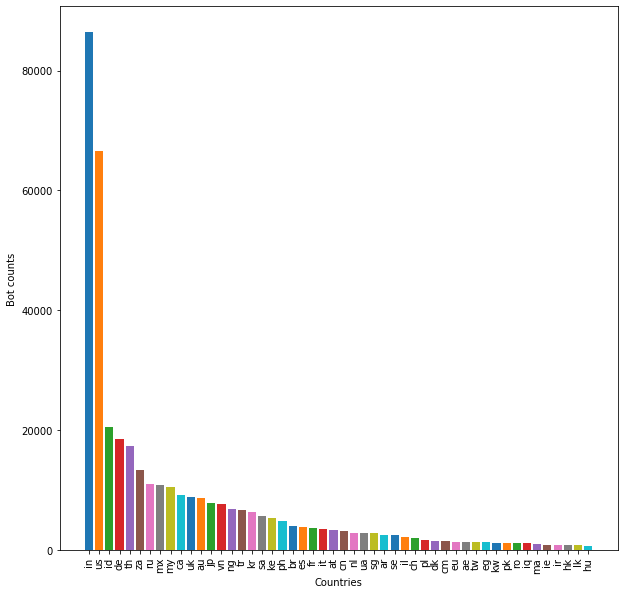

In [20]:
country_stats = country_stats.sort_values(by="count", ascending = False)
plt.figure(figsize=(10,10))
for i in country_stats["country"][:50]:
    plt.bar(i,country_stats.loc[count_stats["country"] == i ]["count"])
plt.xlabel("Countries")
plt.ylabel("Bot counts")
plt.xticks(rotation = 90)
plt.show()